In [1]:
#Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle("fkrtl.pkl")

In [3]:
missing_values_count = df.isnull().sum()

In [4]:
missing_values_count

Unnamed: 0          0
PSTV01              0
PSTV02              0
PSTV15              0
FKP02         2837104
FKL02               0
FKL03               0
FKL04               0
FKL05               0
FKL06               0
FKL07               0
FKL08               0
FKL09               0
FKL10               0
FKL11              39
FKL12               0
FKL13               0
FKL14               0
FKL15               0
FKL15A         341884
FKL16          341884
FKL16A         341884
FKL17             464
FKL17A            464
FKL18             464
FKL18A            464
FKL19               0
FKL19A              0
FKL20               0
FKL21               0
FKL22               0
FKL23               0
FKL25               3
FKL26               3
FKL27               0
FKL28               0
FKL29               0
FKL30         2914806
FKL31               0
FKL32               0
FKL33         5095996
FKL34          407034
FKL35         5077110
FKL36         5076972
FKL37          407034
FKL38     

In [5]:
unique_values_count = df.nunique()

In [6]:
unique_values_count

Unnamed: 0    5096036
PSTV01         129350
PSTV02         128879
PSTV15          57616
FKP02          700506
FKL02         5096036
FKL03            2192
FKL04            2211
FKL05              34
FKL06             484
FKL07               9
FKL08               3
FKL09              28
FKL10               2
FKL11             126
FKL12               5
FKL13               3
FKL14               5
FKL15            1721
FKL15A           1720
FKL16            9282
FKL16A           9583
FKL17            1381
FKL17A           1381
FKL18            6334
FKL18A           7472
FKL19             884
FKL19A           1208
FKL20              23
FKL21               8
FKL22              59
FKL23               4
FKL25              36
FKL26             507
FKL27              10
FKL28              14
FKL29              47
FKL30          101129
FKL31               5
FKL32           27472
FKL33               5
FKL34               7
FKL35              14
FKL36              19
FKL37             180
FKL38     

In [7]:
filtered_df = df.head(100)

In [8]:
filtered_df.to_excel('fkrtl_100_data.xlsx', index=False)

In [9]:
df.shape

(5096036, 56)

In [10]:
df = df.drop(columns=['FKL15','FKL16','FKL16A','FKL17','FKL17A','FKL18','FKL18A','FKL19A','FKL30','FKL33','FKL35','FKL36','FKL38','FKL39','FKL41','FKL42','FKL44','FKL45'])

In [11]:
df.shape

(5096036, 38)

In [12]:
df = df.drop(columns=['FKL03','FKL04'])

In [ ]:
df = df.drop(columns=['PSTV02','FKP02','FKL02'])

In [17]:
majority_vote_columns = ['FKL05','FKL06','FKL07','FKL08','FKL09','FKL10','FKL11','FKL12','FKL13','FKL14','FKL19','FKL20','FKL21','FKL22','FKL23','FKL25','FKL26','FKL27','FKL28','FKL29']

In [14]:
sum_columns = ['FKL31','FKL32','FKL34','FKL37','FKL40','FKL43','FKL46','FKL47','FKL48']

In [7]:
def custom_majority_vote(group):
    # Apply majority voting to specified columns
    majority_voted_values = {}
    for col in majority_vote_columns:
        counts = group[col].value_counts()
        majority_voted_values[col] = counts.index[0]
    
    # Apply sum to specified columns
    summed_values = {}
    for col in sum_columns:
        summed_values[col] = group[col].sum()
    
    # Combine the majority voted and summed values into a single dictionary
    result_dict = {**majority_voted_values, **summed_values}
    
    return pd.Series(result_dict)

In [18]:
majority_voted_df = df.groupby('PSTV01').apply(custom_majority_vote).reset_index()

In [19]:
majority_voted_df

,PSTV01,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,...,FKL29,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48
0,968,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,...,NON RAWAT INAP,70,18531700.0,0.0,0.0,0.0,0.0,0.0,18531700,18531700
1,2081,MALUKU UTARA,KOTA TERNATE,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,MAT,PPU,Kelas 3,...,NON RAWAT INAP,5,194300.0,0.0,0.0,0.0,0.0,0.0,194300,194300
2,2535,SUMATERA SELATAN,OGAN KOMERING ULU TIMUR,Swasta,Rumah sakit,RS Swasta Setara Type D,RJTL,SAR,PPU,Kelas 3,...,KLINIK NON RAWAT INAP,20,2767500.0,0.0,0.0,0.0,0.0,0.0,2767500,2767500
3,2813,JAWA BARAT,KOTA DEPOK,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,Bukan pekerja,Kelas 3,...,NON RAWAT INAP,70,16056200.0,0.0,0.0,0.0,0.0,0.0,16056200,16056200
4,5145,DKI JAKARTA,KOTA JAKARTA BARAT,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,PPU,Kelas 3,...,NON RAWAT INAP,3,2556400.0,0.0,0.0,0.0,0.0,0.0,2556400,2556400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129345,455353898,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,GIG,PPU,Kelas 3,...,KLINIK NON RAWAT INAP,20,4981400.0,0.0,0.0,0.0,0.0,0.0,4981400,4981400
129346,455357481,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,...,NON RAWAT INAP,14,2566200.0,0.0,0.0,0.0,0.0,0.0,2566200,2566200
129347,455362820,JAWA BARAT,KOTA BANDUNG,Pemerintah kab/kota,Rumah sakit,RS Kelas D,RJTL,INT,PPU,Kelas 3,...,NON RAWAT INAP,89,49163200.0,0.0,0.0,0.0,0.0,0.0,49163200,49163200
129348,455386814,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,HDL,PBPU,Kelas 3,...,DOKTER PRAKTER PERORANGAN,127,108622700.0,0.0,0.0,0.0,0.0,0.0,108622700,108622700


In [20]:
majority_voted_df.to_pickle("majority_voted_df.pkl")

In [2]:
majority_voted_df = pd.read_pickle("majority_voted_df.pkl")

In [3]:
df = pd.read_pickle("FKRTL_preprocessed.pkl")

In [4]:
df = df.dropna()
grouped = df.groupby(['PSTV01','FKL17A']).size().reset_index(name='counts')
table = grouped.pivot(index='PSTV01', columns='FKL17A', values='counts').fillna(0)
table = table.assign(PSTV01=table.index)
table.reset_index(drop = True, inplace = True)

In [7]:
table.to_pickle("FKRTL_pivot_table.pkl")

In [5]:
merged_df = majority_voted_df.merge(table, on='PSTV01', how='outer')

In [6]:
merged_df

,PSTV01,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,FKL13,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,968,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2081,MALUKU UTARA,KOTA TERNATE,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,MAT,PPU,Kelas 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2535,SUMATERA SELATAN,OGAN KOMERING ULU TIMUR,Swasta,Rumah sakit,RS Swasta Setara Type D,RJTL,SAR,PPU,Kelas 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2813,JAWA BARAT,KOTA DEPOK,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,Bukan pekerja,Kelas 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5145,DKI JAKARTA,KOTA JAKARTA BARAT,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,PPU,Kelas 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129345,455353898,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,GIG,PPU,Kelas 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129346,455357481,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,Kelas 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129347,455362820,JAWA BARAT,KOTA BANDUNG,Pemerintah kab/kota,Rumah sakit,RS Kelas D,RJTL,INT,PPU,Kelas 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129348,455386814,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,HDL,PBPU,Kelas 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = df[['PSTV01','PSTV15']]
df

,PSTV01,PSTV15
0,70619112,7.358984
1,96034419,12.906066
2,14741075,11.666671
3,67539904,12.439169
4,83461803,13.145741
...,...,...
5096031,302181284,11.670058
5096032,75269406,13.784458
5096033,17332542,10.707231
5096034,42348381,9.206220


In [5]:
majority_vote_columns = ['PSTV15']

In [6]:
sum_columns = []

In [8]:
majority_voted_df = df.groupby('PSTV01').apply(custom_majority_vote).reset_index()

In [9]:
majority_voted_df

,PSTV01,PSTV15
0,968,13.006498
1,2081,1.561053
2,2535,5.803837
3,2813,11.688430
4,5145,13.006516
...,...,...
129345,455353898,13.253727
129346,455357481,14.104879
129347,455362820,12.718613
129348,455386814,7.352901


In [16]:
majority_voted_df2 = pd.read_pickle("majority_voted_df.pkl")

In [18]:
merged_df

,PSTV01,PSTV15,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,...,FKL29,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48
0,968,13.006498,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,...,NON RAWAT INAP,70,18531700.0,0.0,0.0,0.0,0.0,0.0,18531700,18531700
1,2081,1.561053,MALUKU UTARA,KOTA TERNATE,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,MAT,PPU,...,NON RAWAT INAP,5,194300.0,0.0,0.0,0.0,0.0,0.0,194300,194300
2,2535,5.803837,SUMATERA SELATAN,OGAN KOMERING ULU TIMUR,Swasta,Rumah sakit,RS Swasta Setara Type D,RJTL,SAR,PPU,...,KLINIK NON RAWAT INAP,20,2767500.0,0.0,0.0,0.0,0.0,0.0,2767500,2767500
3,2813,11.688430,JAWA BARAT,KOTA DEPOK,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,Bukan pekerja,...,NON RAWAT INAP,70,16056200.0,0.0,0.0,0.0,0.0,0.0,16056200,16056200
4,5145,13.006516,DKI JAKARTA,KOTA JAKARTA BARAT,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,PPU,...,NON RAWAT INAP,3,2556400.0,0.0,0.0,0.0,0.0,0.0,2556400,2556400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129345,455353898,13.253727,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,GIG,PPU,...,KLINIK NON RAWAT INAP,20,4981400.0,0.0,0.0,0.0,0.0,0.0,4981400,4981400
129346,455357481,14.104879,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,...,NON RAWAT INAP,14,2566200.0,0.0,0.0,0.0,0.0,0.0,2566200,2566200
129347,455362820,12.718613,JAWA BARAT,KOTA BANDUNG,Pemerintah kab/kota,Rumah sakit,RS Kelas D,RJTL,INT,PPU,...,NON RAWAT INAP,89,49163200.0,0.0,0.0,0.0,0.0,0.0,49163200,49163200
129348,455386814,7.352901,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,HDL,PBPU,...,DOKTER PRAKTER PERORANGAN,127,108622700.0,0.0,0.0,0.0,0.0,0.0,108622700,108622700


In [20]:
merged_df.to_pickle("majority_voted_df.pkl")

In [3]:
majority_voted_df = pd.read_pickle("majority_voted_df.pkl")

In [5]:
fkrtl = pd.read_pickle("FKRTL_pivot_table.pkl")

In [6]:
merged_df = majority_voted_df.merge(fkrtl, on='PSTV01', how='outer')

In [7]:
df = pd.read_excel("DM_kepesertaan.xlsx")

In [8]:
missing_values_count = df.isnull().sum()
missing_values_count

Unnamed: 0         0
PSTV01             0
PSTV02             0
PSTV03             0
PSTV04             0
PSTV05             0
PSTV06             0
PSTV07             0
PSTV08             0
PSTV09             0
PSTV10             0
PSTV11             0
PSTV12             0
PSTV13             0
PSTV14             0
PSTV15             0
PSTV16             0
PSTV17             0
PSTV18        133228
dtype: int64

In [9]:
unique_values_count = df.nunique()
unique_values_count

Unnamed: 0    143496
PSTV01        143496
PSTV02        142929
PSTV03         18552
PSTV04             5
PSTV05             2
PSTV06             3
PSTV07             3
PSTV08             5
PSTV09            35
PSTV10           483
PSTV11             9
PSTV12             3
PSTV13            34
PSTV14           488
PSTV15         62209
PSTV16             1
PSTV17             3
PSTV18             2
dtype: int64

In [10]:
df = df.drop(columns=['PSTV02','PSTV18'])

In [19]:
def get_year(born):
    born = str(born)
    born = parser.parse(born)
    return born.year

In [21]:
from datetime import date
import datetime
from dateutil import parser
df['PSTV03'] = df['PSTV03'].apply(get_year)

In [22]:
df['PSTV03']

0         1959
1         1965
2         1964
3         1959
4         1947
          ... 
143491    1973
143492    1961
143493    1957
143494    1960
143495    1970
Name: PSTV03, Length: 143496, dtype: int64

In [23]:
df

,Unnamed: 0,PSTV01,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,0,45243428,1959,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,PIDIE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,PIDIE,11.468968,2020,AKTIF
1,1,356470819,1965,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,KOTA BANDA ACEH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA BANDA ACEH,9.863322,2020,AKTIF
2,2,72280409,1964,ISTRI,PEREMPUAN,CERAI,KELAS I,BUKAN PEKERJA,SUMATERA UTARA,BATU BARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,BATU BARA,8.487743,2020,AKTIF
3,3,88501975,1959,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,ASAHAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,ASAHAN,10.726228,2020,MENINGGAL
4,4,94870095,1947,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,SUMATERA BARAT,PESISIR SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,PESISIR SELATAN,10.539836,2020,AKTIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143491,143491,86676962,1973,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBPU,SUMATERA BARAT,LIMA PULUH KOTA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,LIMA PULUH KOTA,10.082354,2020,AKTIF
143492,143492,271462222,1961,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBPU,JAWA TENGAH,BOYOLALI,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,BOYOLALI,10.813870,2020,AKTIF
143493,143493,363634607,1957,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBPU,SUMATERA UTARA,MANDAILING NATAL,SWASTA,DOKTER UMUM,SUMATERA UTARA,MANDAILING NATAL,3.701957,2020,AKTIF
143494,143494,280551769,1960,TAMBAHAN,PEREMPUAN,KAWIN,KELAS III,PBI APBD,JAWA TENGAH,KEBUMEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,KEBUMEN,12.792413,2020,AKTIF


In [29]:
table = pd.read_pickle("FKRTL_pivot_table.pkl")

In [39]:
table

FKL17A,A00,A01,A02,A03,A04,A05,A06,A08,A09,A15,...,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99,PSTV01
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,968
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2081
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2535
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2813
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455353898
129345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455357481
129346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455362820
129347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455386814


In [24]:
df3 = pd.read_excel("DM20152020_fktpnonkapitasi.xlsx")

In [30]:
df3 = df3[["PSTV01", "PNK13A"]]
df3 = df3.dropna()
grouped2 = df3.groupby(['PSTV01','PNK13A']).size().reset_index(name='counts')
table2 = grouped2.pivot(index='PSTV01', columns='PNK13A', values='counts').fillna(0)
table2 = table2.assign(PSTV01=table2.index)
table2.reset_index(drop = True, inplace = True)

In [31]:
common_columns = list(set(table.columns) & set(table2.columns))
common_columns.remove('PSTV01')
unique_columns_a = list(set(table.columns) - set(table2.columns))
unique_columns_b = list(set(table2.columns) - set(table.columns))
merged_df3 = table.merge(table2, on='PSTV01', how='outer')
for column in common_columns:
    merged_df3[column] = merged_df3[f'{column}_x'].fillna(0) + merged_df3[f'{column}_y'].fillna(0)
merged_df3 = merged_df3.fillna(0)
merged_df3 = merged_df3[['PSTV01'] + common_columns + unique_columns_a + unique_columns_b]

C:\Users\simis\AppData\Local\Temp\ipykernel_11180\1306841690.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df3[column] = merged_df3[f'{column}_x'].fillna(0) + merged_df3[f'{column}_y'].fillna(0)
C:\Users\simis\AppData\Local\Temp\ipykernel_11180\1306841690.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df3[column] = merged_df3[f'{column}_x'].fillna(0) + merged_df3[f'{column}_y'].fillna(0)
C:\Users\simis\AppData\Local\Temp\ipykernel_11180\1306841690.py:7: PerformanceWarning: DataFrame is highly fragmented.

In [32]:
sorted_columns = sorted(merged_df3.columns.drop("PSTV01"))
merged_df3 = merged_df3[["PSTV01"] + sorted_columns]
merged_df3

,PSTV01,A00,A01,A02,A03,A04,A05,A06,A08,A09,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2813,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129447,409797115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129448,427513161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129449,432927211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129450,439399622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
merged_df = majority_voted_df.merge(merged_df3, on='PSTV01', how='inner')
merged_df

,PSTV01,PSTV15,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,968,13.006498,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2081,1.561053,MALUKU UTARA,KOTA TERNATE,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,MAT,PPU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2535,5.803837,SUMATERA SELATAN,OGAN KOMERING ULU TIMUR,Swasta,Rumah sakit,RS Swasta Setara Type D,RJTL,SAR,PPU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2813,11.688430,JAWA BARAT,KOTA DEPOK,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,Bukan pekerja,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5145,13.006516,DKI JAKARTA,KOTA JAKARTA BARAT,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,PPU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129344,455353898,13.253727,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,GIG,PPU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129345,455357481,14.104879,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129346,455362820,12.718613,JAWA BARAT,KOTA BANDUNG,Pemerintah kab/kota,Rumah sakit,RS Kelas D,RJTL,INT,PPU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129347,455386814,7.352901,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,HDL,PBPU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df = df.drop(columns=['PSTV15'])

In [41]:
merged_df2 = merged_df.merge(df, on='PSTV01', how='inner')

In [42]:
merged_df2

,PSTV01,PSTV15,FKL05,FKL06,FKL07,FKL08,FKL09,FKL10,FKL11,FKL12,...,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17
0,968,13.006498,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,...,KELAS II,PBPU,JAWA TIMUR,KOTA SURABAYA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TIMUR,KOTA SURABAYA,2020,AKTIF
1,2081,1.561053,MALUKU UTARA,KOTA TERNATE,Pemerintah provinsi,Rumah sakit,RS Kelas B,RJTL,MAT,PPU,...,KELAS II,PPU,MALUKU UTARA,KOTA TIDORE KEPULAUAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,MALUKU UTARA,KOTA TIDORE KEPULAUAN,2020,AKTIF
2,2535,5.803837,SUMATERA SELATAN,OGAN KOMERING ULU TIMUR,Swasta,Rumah sakit,RS Swasta Setara Type D,RJTL,SAR,PPU,...,KELAS II,PPU,SUMATERA SELATAN,OGAN KOMERING ULU TIMUR,SWASTA,KLINIK PRATAMA,SUMATERA SELATAN,OGAN KOMERING ULU TIMUR,2020,AKTIF
3,2813,11.688430,JAWA BARAT,KOTA DEPOK,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,Bukan pekerja,...,KELAS I,BUKAN PEKERJA,JAWA BARAT,KOTA DEPOK,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,KOTA DEPOK,2020,AKTIF
4,5145,13.006516,DKI JAKARTA,KOTA JAKARTA BARAT,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,INT,PPU,...,KELAS II,PPU,DKI JAKARTA,KOTA JAKARTA BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,DKI JAKARTA,KOTA JAKARTA BARAT,2020,AKTIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129344,455353898,13.253727,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,GIG,PPU,...,KELAS I,PPU,JAWA BARAT,KOTA BANDUNG,SWASTA,KLINIK PRATAMA,JAWA TENGAH,KOTA SURAKARTA,2020,AKTIF
129345,455357481,14.104879,JAWA TIMUR,KOTA SURABAYA,Pemerintah kab/kota,Rumah sakit,RS Kelas B,RJTL,INT,PBPU,...,KELAS III,PBPU,JAWA TIMUR,KOTA SURABAYA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TIMUR,KOTA SURABAYA,2020,AKTIF
129346,455362820,12.718613,JAWA BARAT,KOTA BANDUNG,Pemerintah kab/kota,Rumah sakit,RS Kelas D,RJTL,INT,PPU,...,KELAS I,PPU,JAWA BARAT,BANDUNG BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,BANDUNG BARAT,2020,AKTIF
129347,455386814,7.352901,JAWA TENGAH,KOTA SURAKARTA,Swasta,Rumah sakit,RS Swasta Setara Type C,RJTL,HDL,PBPU,...,KELAS III,PBPU,JAWA TENGAH,SRAGEN,SWASTA,DOKTER UMUM,JAWA TENGAH,SRAGEN,2020,AKTIF


In [43]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129349 entries, 0 to 129348
Columns: 1443 entries, PSTV01 to PSTV17
dtypes: float64(1404), int64(8), object(31)
memory usage: 1.4+ GB


In [44]:
merged_df2.to_pickle("merging_semua_fitur.pkl")

In [2]:
df = pd.read_pickle("merging_semua_fitur.pkl")

In [19]:
icd_chronic = ["F84", "C67", "D09", "C40", "C41", "C49", "C47", "C70", "C71", "C72", "C50", "D05", "C34", "D02",
               "C53", "D06", "R87", "D01", "D00", "C00", "C01", "C02", "C03", "C04", "C05", "C06", "C07", "C08", "C09", "C10", 
               "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", 
               "C27", "C28", "C29", "C30", "C31", "C32", "C76", "C64", "C65", "C51", "C52", "C57", "C58", "D07", "C45", "C48", 
               "C60", "C63", "C33", "C38", "C39", "C66", "C68", "C56", "C61", "R85", "C62", "C73", "E31", "C54", "C55", "C81", 
               "C90", "C91", "C92", "C93", "C94", "C95", "C80", "C43", "D03", "C82", "C83", "C84", "C85", "C86", "C88", "C96", 
               "C44", "D04", "C77", "C78", "C79", "J91", "R18", "C37", "C46", "C69", "C74", "C75", "A18", "A52", "B52", "D30",
               "D41", "D59", "E08", "E09", "E10", "E11", "E13", "E74", "I12", "I13", "I70", "I72", "K76", "M10", "M32", "M35",
               "N00", "N01", "N02", "N03", "N04", "N05", "N06", "N07", "N08", "N13", "N14", "N15", "N16", "N17", "N18", "N19",
               "N25", "N26", "Q61", "Q62", "R94", "J45", "J40", "J41", "J42", "J43", "J44", "J47", "F32", "F33", "F34", "F43",
               "O24", "G32", "R73", "R81", "R82", "O99", "I09", "I50", "I20", "I21", "I24", "I25", "D66", "D67",
               "D68", "B15", "B19", "B16", "B18", "B17", "B25", "B26", "B58", "B94", "K71", "K73", "K74", "K75", "E78", "I10",
               "I11", "I14", "I15", "I16", "I67", "E65", "E66", "D57", "G45", "G46", "G97", "I60", "I61", "I63", "I66", "I97"]

In [5]:
pstv_columns = [col for col in df.columns if col.startswith('PSTV')]
fkl_columns = [col for col in df.columns if col.startswith('FKL')]
exclude_columns = pstv_columns + fkl_columns
exclude_columns

['PSTV01',
 'PSTV15',
 'PSTV03',
 'PSTV04',
 'PSTV05',
 'PSTV06',
 'PSTV07',
 'PSTV08',
 'PSTV09',
 'PSTV10',
 'PSTV11',
 'PSTV12',
 'PSTV13',
 'PSTV14',
 'PSTV16',
 'PSTV17',
 'FKL05',
 'FKL06',
 'FKL07',
 'FKL08',
 'FKL09',
 'FKL10',
 'FKL11',
 'FKL12',
 'FKL13',
 'FKL14',
 'FKL19',
 'FKL20',
 'FKL21',
 'FKL22',
 'FKL23',
 'FKL25',
 'FKL26',
 'FKL27',
 'FKL28',
 'FKL29',
 'FKL31',
 'FKL32',
 'FKL34',
 'FKL37',
 'FKL40',
 'FKL43',
 'FKL46',
 'FKL47',
 'FKL48']

In [6]:
df_filtered = df.drop(columns=exclude_columns)
column_counts = df_filtered[df_filtered >= 1].count()
columns_to_delete = column_counts[column_counts <= 100].index
df_filtered = df_filtered.drop(columns=columns_to_delete)

In [7]:
row_counts = df_filtered[df_filtered >= 1].sum(axis=1)
rows_to_delete = row_counts[row_counts <= 1].index
df_filtered = df_filtered.drop(index=rows_to_delete)

In [8]:
filtered_columns = df[exclude_columns]
combined_df = pd.concat([df_filtered, filtered_columns], axis=1)

In [9]:
combined_df = combined_df.dropna()
combined_df = combined_df.reset_index(drop=True)

In [10]:
df = combined_df
df

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,FKL29,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NON RAWAT INAP,70,18531700.0,0.0,0.0,0.0,0.0,0.0,18531700,18531700
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NON RAWAT INAP,5,194300.0,0.0,0.0,0.0,0.0,0.0,194300,194300
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,KLINIK NON RAWAT INAP,20,2767500.0,0.0,0.0,0.0,0.0,0.0,2767500,2767500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NON RAWAT INAP,70,16056200.0,0.0,0.0,0.0,0.0,0.0,16056200,16056200
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NON RAWAT INAP,3,2556400.0,0.0,0.0,0.0,0.0,0.0,2556400,2556400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,KLINIK NON RAWAT INAP,20,4981400.0,0.0,0.0,0.0,0.0,0.0,4981400,4981400
129345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NON RAWAT INAP,14,2566200.0,0.0,0.0,0.0,0.0,0.0,2566200,2566200
129346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NON RAWAT INAP,89,49163200.0,0.0,0.0,0.0,0.0,0.0,49163200,49163200
129347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,DOKTER PRAKTER PERORANGAN,127,108622700.0,0.0,0.0,0.0,0.0,0.0,108622700,108622700


In [20]:
existing_columns = [column for column in icd_chronic if column in df.columns]

In [12]:
df['is_chronic'] = 0

In [14]:
for ICD in existing_columns:
    PSTV01_list = list(df.loc[df[ICD] > 0, 'PSTV01'])
    df['is_chronic'] = df.apply(lambda row: 1 if row['PSTV01'] in PSTV01_list else row['is_chronic'], axis=1)

In [15]:
chronic_counts = df['is_chronic'].value_counts()
chronic_counts

1    95065
0    34284
Name: is_chronic, dtype: int64

In [16]:
correlation_matrix = df.corr()

C:\Users\simis\AppData\Local\Temp\ipykernel_3492\4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [17]:
correlation_matrix

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
A01,1.000000,0.004896,0.054880,0.004464,0.009857,0.006704,0.011993,0.046138,0.041083,0.027252,...,0.031330,0.043633,-0.000596,-0.000546,0.000820,0.005472,-0.000652,0.041694,0.041664,0.022605
A06,0.004896,1.000000,0.031706,-0.000922,0.009346,-0.000974,0.002305,0.005879,0.003223,0.003684,...,0.007398,0.015227,-0.000129,0.002085,-0.001574,0.001544,-0.000167,0.014701,0.014710,0.000777
A09,0.054880,0.031706,1.000000,0.000444,0.012333,0.005363,0.010947,0.040113,0.017273,0.020011,...,0.097960,0.112138,-0.000930,0.023311,0.011532,0.015509,-0.000764,0.110026,0.110059,0.053857
A15,0.004464,-0.000922,0.000444,1.000000,0.121059,0.009445,0.003352,0.000486,0.001690,-0.001236,...,0.018397,0.016378,-0.000301,-0.003348,-0.002349,-0.003429,-0.000322,0.015324,0.015333,0.010036
A16,0.009857,0.009346,0.012333,0.121059,1.000000,0.021516,0.004712,0.006744,-0.002713,0.001573,...,0.031479,0.035264,-0.000530,-0.000307,-0.003706,-0.001829,-0.000624,0.033636,0.033654,0.018597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FKL43,0.005472,0.001544,0.015509,-0.003429,-0.001829,0.016072,-0.004580,0.011021,0.015392,-0.000369,...,0.117199,0.121637,-0.000440,0.058805,0.041280,1.000000,-0.000279,0.130302,0.130339,0.018719
FKL46,-0.000652,-0.000167,-0.000764,-0.000322,-0.000624,-0.000146,0.002097,-0.000195,-0.000359,-0.000352,...,0.010572,0.039708,-0.000019,0.000334,-0.000066,-0.000279,1.000000,0.144526,0.144542,0.002194
FKL47,0.041694,0.014701,0.110026,0.015324,0.033636,0.020509,0.052018,0.052108,0.013783,0.015392,...,0.600992,0.990210,0.000058,0.356837,0.112064,0.130302,0.144526,1.000000,0.999967,0.213349
FKL48,0.041664,0.014710,0.110059,0.015333,0.033654,0.020512,0.052024,0.052120,0.013786,0.015406,...,0.601020,0.990180,0.000059,0.356839,0.111822,0.130339,0.144542,0.999967,1.000000,0.213345


In [19]:
correlation_matrix['is_chronic'].sort_values()

PSTV03       -0.048618
H52          -0.018225
PSTV01       -0.015959
Z34          -0.008780
O42          -0.008778
                ...   
FKL47         0.213349
FKL32         0.215794
E11           0.287870
is_chronic    1.000000
PSTV16             NaN
Name: is_chronic, Length: 423, dtype: float64

In [21]:
correlation_matrix['is_chronic'].sort_values(ascending=False)

is_chronic    1.000000
E11           0.287870
FKL32         0.215794
FKL47         0.213349
FKL48         0.213345
                ...   
Z34          -0.008780
PSTV01       -0.015959
H52          -0.018225
PSTV03       -0.048618
PSTV16             NaN
Name: is_chronic, Length: 423, dtype: float64

In [22]:
df.to_pickle('combined_df1.pkl')

In [25]:
df = df.drop(columns=existing_columns)

In [26]:
df

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,18531700.0,0.0,0.0,0.0,0.0,0.0,18531700,18531700,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,194300.0,0.0,0.0,0.0,0.0,0.0,194300,194300,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,2767500.0,0.0,0.0,0.0,0.0,0.0,2767500,2767500,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,16056200.0,0.0,0.0,0.0,0.0,0.0,16056200,16056200,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2556400.0,0.0,0.0,0.0,0.0,0.0,2556400,2556400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,4981400.0,0.0,0.0,0.0,0.0,0.0,4981400,4981400,0
129345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14,2566200.0,0.0,0.0,0.0,0.0,0.0,2566200,2566200,0
129346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89,49163200.0,0.0,0.0,0.0,0.0,0.0,49163200,49163200,1
129347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127,108622700.0,0.0,0.0,0.0,0.0,0.0,108622700,108622700,1


In [23]:
existing_columns

['C50',
 'C53',
 'R18',
 'A18',
 'E10',
 'E11',
 'E13',
 'I12',
 'I13',
 'K76',
 'M10',
 'N04',
 'N13',
 'N17',
 'N18',
 'N19',
 'J45',
 'J40',
 'J42',
 'J44',
 'J47',
 'F32',
 'O24',
 'R73',
 'O99',
 'I50',
 'I20',
 'I21',
 'I24',
 'I25',
 'B16',
 'B18',
 'K71',
 'K74',
 'K75',
 'E78',
 'I10',
 'I11',
 'I15',
 'I67',
 'E66',
 'G45',
 'I61',
 'I63']

In [27]:
correlation_matrix = df.corr()

C:\Users\simis\AppData\Local\Temp\ipykernel_3492\4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [28]:
correlation_matrix

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
A01,1.000000,0.004896,0.054880,0.004464,0.009857,0.011993,0.046138,0.041083,0.027252,0.000027,...,0.031330,0.043633,-0.000596,-0.000546,0.000820,0.005472,-0.000652,0.041694,0.041664,0.022605
A06,0.004896,1.000000,0.031706,-0.000922,0.009346,0.002305,0.005879,0.003223,0.003684,-0.001322,...,0.007398,0.015227,-0.000129,0.002085,-0.001574,0.001544,-0.000167,0.014701,0.014710,0.000777
A09,0.054880,0.031706,1.000000,0.000444,0.012333,0.010947,0.040113,0.017273,0.020011,0.009270,...,0.097960,0.112138,-0.000930,0.023311,0.011532,0.015509,-0.000764,0.110026,0.110059,0.053857
A15,0.004464,-0.000922,0.000444,1.000000,0.121059,0.003352,0.000486,0.001690,-0.001236,0.002319,...,0.018397,0.016378,-0.000301,-0.003348,-0.002349,-0.003429,-0.000322,0.015324,0.015333,0.010036
A16,0.009857,0.009346,0.012333,0.121059,1.000000,0.004712,0.006744,-0.002713,0.001573,0.001655,...,0.031479,0.035264,-0.000530,-0.000307,-0.003706,-0.001829,-0.000624,0.033636,0.033654,0.018597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FKL43,0.005472,0.001544,0.015509,-0.003429,-0.001829,-0.004580,0.011021,0.015392,-0.000369,0.005855,...,0.117199,0.121637,-0.000440,0.058805,0.041280,1.000000,-0.000279,0.130302,0.130339,0.018719
FKL46,-0.000652,-0.000167,-0.000764,-0.000322,-0.000624,0.002097,-0.000195,-0.000359,-0.000352,-0.000198,...,0.010572,0.039708,-0.000019,0.000334,-0.000066,-0.000279,1.000000,0.144526,0.144542,0.002194
FKL47,0.041694,0.014701,0.110026,0.015324,0.033636,0.052018,0.052108,0.013783,0.015392,0.015015,...,0.600992,0.990210,0.000058,0.356837,0.112064,0.130302,0.144526,1.000000,0.999967,0.213349
FKL48,0.041664,0.014710,0.110059,0.015333,0.033654,0.052024,0.052120,0.013786,0.015406,0.015020,...,0.601020,0.990180,0.000059,0.356839,0.111822,0.130339,0.144542,0.999967,1.000000,0.213345


In [29]:
correlation_matrix['is_chronic'].sort_values()

PSTV03       -0.048618
H52          -0.018225
PSTV01       -0.015959
Z34          -0.008780
O42          -0.008778
                ...   
FKL48         0.213345
FKL47         0.213349
FKL32         0.215794
is_chronic    1.000000
PSTV16             NaN
Name: is_chronic, Length: 379, dtype: float64

In [30]:
correlation_matrix['is_chronic'].sort_values(ascending=False)

is_chronic    1.000000
FKL32         0.215794
FKL47         0.213349
FKL48         0.213345
FKL31         0.187973
                ...   
Z34          -0.008780
PSTV01       -0.015959
H52          -0.018225
PSTV03       -0.048618
PSTV16             NaN
Name: is_chronic, Length: 379, dtype: float64

In [31]:
object_columns = df.select_dtypes(include='object').columns.tolist()

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [33]:
df

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,18531700.0,0.0,0.0,0.0,0.0,0.0,18531700,18531700,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,194300.0,0.0,0.0,0.0,0.0,0.0,194300,194300,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,2767500.0,0.0,0.0,0.0,0.0,0.0,2767500,2767500,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,16056200.0,0.0,0.0,0.0,0.0,0.0,16056200,16056200,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2556400.0,0.0,0.0,0.0,0.0,0.0,2556400,2556400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,4981400.0,0.0,0.0,0.0,0.0,0.0,4981400,4981400,0
129345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14,2566200.0,0.0,0.0,0.0,0.0,0.0,2566200,2566200,0
129346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89,49163200.0,0.0,0.0,0.0,0.0,0.0,49163200,49163200,1
129347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127,108622700.0,0.0,0.0,0.0,0.0,0.0,108622700,108622700,1


In [34]:
correlation_matrix = df.corr()

In [35]:
correlation_matrix

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
A01,1.000000,0.004896,0.054880,0.004464,0.009857,0.011993,0.046138,0.041083,0.027252,0.000027,...,0.031330,0.043633,-0.000596,-0.000546,0.000820,0.005472,-0.000652,0.041694,0.041664,0.022605
A06,0.004896,1.000000,0.031706,-0.000922,0.009346,0.002305,0.005879,0.003223,0.003684,-0.001322,...,0.007398,0.015227,-0.000129,0.002085,-0.001574,0.001544,-0.000167,0.014701,0.014710,0.000777
A09,0.054880,0.031706,1.000000,0.000444,0.012333,0.010947,0.040113,0.017273,0.020011,0.009270,...,0.097960,0.112138,-0.000930,0.023311,0.011532,0.015509,-0.000764,0.110026,0.110059,0.053857
A15,0.004464,-0.000922,0.000444,1.000000,0.121059,0.003352,0.000486,0.001690,-0.001236,0.002319,...,0.018397,0.016378,-0.000301,-0.003348,-0.002349,-0.003429,-0.000322,0.015324,0.015333,0.010036
A16,0.009857,0.009346,0.012333,0.121059,1.000000,0.004712,0.006744,-0.002713,0.001573,0.001655,...,0.031479,0.035264,-0.000530,-0.000307,-0.003706,-0.001829,-0.000624,0.033636,0.033654,0.018597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FKL43,0.005472,0.001544,0.015509,-0.003429,-0.001829,-0.004580,0.011021,0.015392,-0.000369,0.005855,...,0.117199,0.121637,-0.000440,0.058805,0.041280,1.000000,-0.000279,0.130302,0.130339,0.018719
FKL46,-0.000652,-0.000167,-0.000764,-0.000322,-0.000624,0.002097,-0.000195,-0.000359,-0.000352,-0.000198,...,0.010572,0.039708,-0.000019,0.000334,-0.000066,-0.000279,1.000000,0.144526,0.144542,0.002194
FKL47,0.041694,0.014701,0.110026,0.015324,0.033636,0.052018,0.052108,0.013783,0.015392,0.015015,...,0.600992,0.990210,0.000058,0.356837,0.112064,0.130302,0.144526,1.000000,0.999967,0.213349
FKL48,0.041664,0.014710,0.110059,0.015333,0.033654,0.052024,0.052120,0.013786,0.015406,0.015020,...,0.601020,0.990180,0.000059,0.356839,0.111822,0.130339,0.144542,0.999967,1.000000,0.213345


In [36]:
correlation_matrix['is_chronic'].sort_values()

FKL11        -0.084796
PSTV03       -0.048618
PSTV07       -0.043678
PSTV05       -0.031978
FKL10        -0.024718
                ...   
FKL48         0.213345
FKL47         0.213349
FKL32         0.215794
is_chronic    1.000000
PSTV16             NaN
Name: is_chronic, Length: 410, dtype: float64

In [37]:
correlation_matrix['is_chronic'].sort_values(ascending=False)

is_chronic    1.000000
FKL32         0.215794
FKL47         0.213349
FKL48         0.213345
FKL31         0.187973
                ...   
PSTV05       -0.031978
PSTV07       -0.043678
PSTV03       -0.048618
FKL11        -0.084796
PSTV16             NaN
Name: is_chronic, Length: 410, dtype: float64

In [44]:
X = df.drop(columns=['is_chronic', 'PSTV01']).values

In [45]:
y= df['is_chronic'].values

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from imblearn.under_sampling import RandomUnderSampler

In [60]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

In [61]:
train_df.to_pickle("all_train_df.pkl")

In [62]:
test_df.to_pickle("all_test_df.pkl")

In [63]:
X_train = train_df.drop(columns=['is_chronic', 'PSTV01']).values
X_test = test_df.drop(columns=['is_chronic', 'PSTV01']).values

In [79]:
y_train = train_df['is_chronic'].values
y_test = test_df['is_chronic'].values

In [65]:
X_train.shape

(116414, 408)

In [66]:
X_test.shape

(12935, 408)

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [80]:
model = RandomForestClassifier(50, max_depth=15, max_features=15)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

              precision    recall  f1-score   support

           0       0.78      0.33      0.46      3432
           1       0.80      0.97      0.87      9503

    accuracy                           0.80     12935
   macro avg       0.79      0.65      0.67     12935
weighted avg       0.79      0.80      0.77     12935

Confusion matrix, without normalization
[[1126 2306]
 [ 322 9181]]


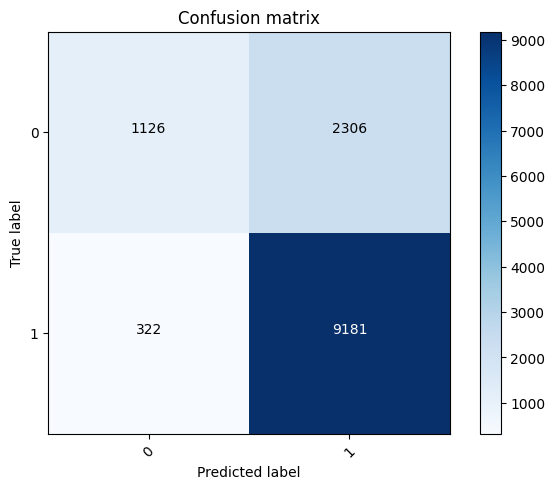

In [81]:
np.set_printoptions(precision=2)

print (classification_report(y_test, preds))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [82]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

              precision    recall  f1-score   support

           0       0.76      0.30      0.43      3432
           1       0.79      0.97      0.87      9503

    accuracy                           0.79     12935
   macro avg       0.78      0.63      0.65     12935
weighted avg       0.78      0.79      0.75     12935

Confusion matrix, without normalization
[[1021 2411]
 [ 318 9185]]


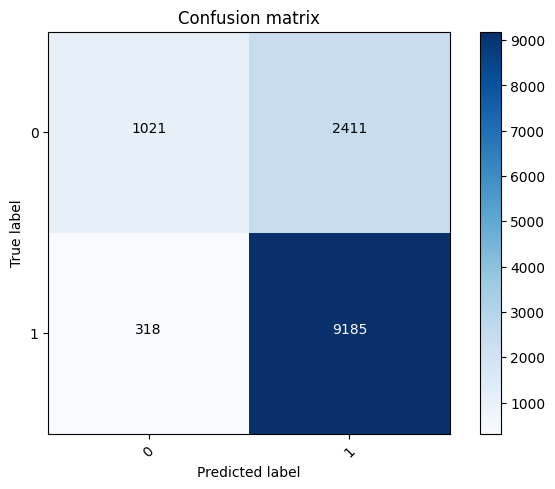

In [83]:
np.set_printoptions(precision=2)

print (classification_report(y_test, preds))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [84]:
model = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

              precision    recall  f1-score   support

           0       0.35      0.62      0.45      3432
           1       0.81      0.58      0.67      9503

    accuracy                           0.59     12935
   macro avg       0.58      0.60      0.56     12935
weighted avg       0.69      0.59      0.61     12935

Confusion matrix, without normalization
[[2145 1287]
 [4025 5478]]


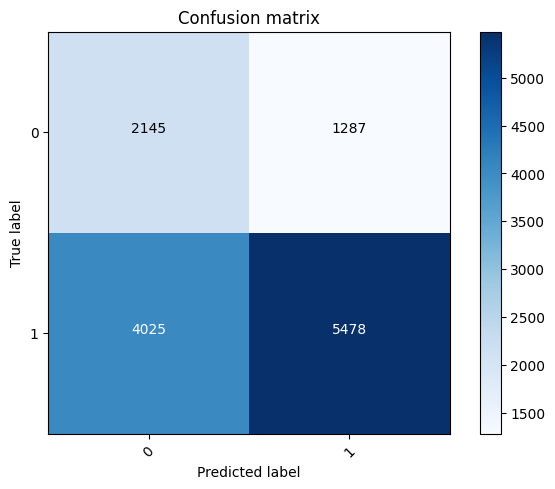

In [85]:
np.set_printoptions(precision=2)

print (classification_report(y_test, preds))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [76]:
pstv_columns = [col for col in df.columns if col.startswith('PSTV')]
fkl_columns = [col for col in df.columns if col.startswith('FKL')]
exclude_columns = pstv_columns + fkl_columns

In [77]:
exclude_columns

['PSTV01',
 'PSTV15',
 'PSTV03',
 'PSTV04',
 'PSTV05',
 'PSTV06',
 'PSTV07',
 'PSTV08',
 'PSTV09',
 'PSTV10',
 'PSTV11',
 'PSTV12',
 'PSTV13',
 'PSTV14',
 'PSTV16',
 'PSTV17',
 'FKL05',
 'FKL06',
 'FKL07',
 'FKL08',
 'FKL09',
 'FKL10',
 'FKL11',
 'FKL12',
 'FKL13',
 'FKL14',
 'FKL19',
 'FKL20',
 'FKL21',
 'FKL22',
 'FKL23',
 'FKL25',
 'FKL26',
 'FKL27',
 'FKL28',
 'FKL29',
 'FKL31',
 'FKL32',
 'FKL34',
 'FKL37',
 'FKL40',
 'FKL43',
 'FKL46',
 'FKL47',
 'FKL48']

In [78]:
exclude_columns.remove('PSTV03')
exclude_columns.remove('PSTV05')

In [86]:
exclude_columns.append('is_chronic')
exclude_columns.append('Unnamed: 0')

In [87]:
exclude_columns

['PSTV01',
 'PSTV15',
 'PSTV04',
 'PSTV06',
 'PSTV07',
 'PSTV08',
 'PSTV09',
 'PSTV10',
 'PSTV11',
 'PSTV12',
 'PSTV13',
 'PSTV14',
 'PSTV16',
 'PSTV17',
 'FKL05',
 'FKL06',
 'FKL07',
 'FKL08',
 'FKL09',
 'FKL10',
 'FKL11',
 'FKL12',
 'FKL13',
 'FKL14',
 'FKL19',
 'FKL20',
 'FKL21',
 'FKL22',
 'FKL23',
 'FKL25',
 'FKL26',
 'FKL27',
 'FKL28',
 'FKL29',
 'FKL31',
 'FKL32',
 'FKL34',
 'FKL37',
 'FKL40',
 'FKL43',
 'FKL46',
 'FKL47',
 'FKL48',
 'is_chronic']

In [88]:
X_train = train_df.drop(columns=exclude_columns).values
X_test = test_df.drop(columns=exclude_columns).values

In [89]:
model = RandomForestClassifier(50, max_depth=15, max_features=15)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3432
           1       0.73      1.00      0.85      9503

    accuracy                           0.73     12935
   macro avg       0.37      0.50      0.42     12935
weighted avg       0.54      0.73      0.62     12935

Confusion matrix, without normalization
[[   0 3432]
 [   0 9503]]


C:\Users\simis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

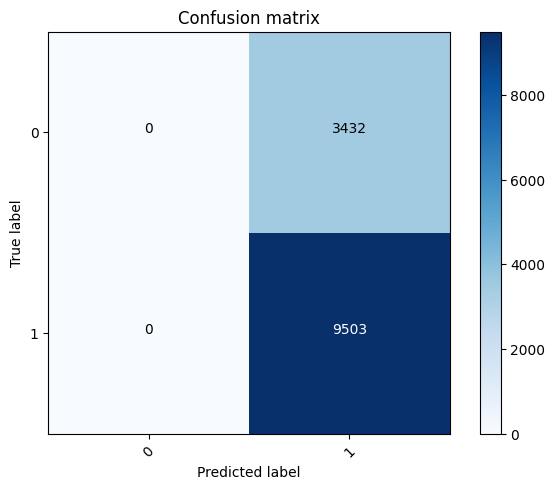

In [90]:
np.set_printoptions(precision=2)

print (classification_report(y_test, preds))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [91]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

              precision    recall  f1-score   support

           0       0.73      0.05      0.10      3432
           1       0.74      0.99      0.85      9503

    accuracy                           0.74     12935
   macro avg       0.74      0.52      0.47     12935
weighted avg       0.74      0.74      0.65     12935

Confusion matrix, without normalization
[[ 181 3251]
 [  68 9435]]


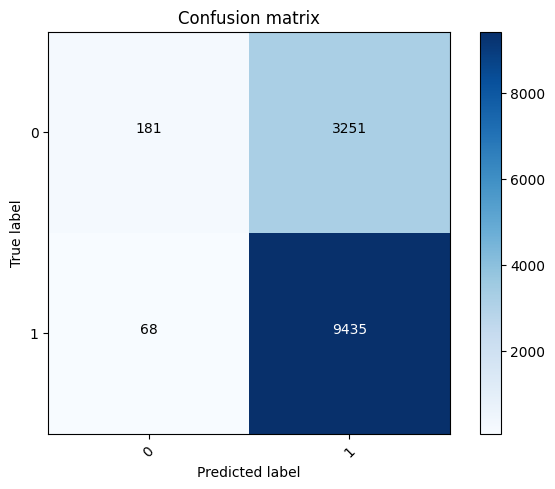

In [92]:
np.set_printoptions(precision=2)

print (classification_report(y_test, preds))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [93]:
model = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

              precision    recall  f1-score   support

           0       0.43      0.44      0.44      3432
           1       0.80      0.79      0.80      9503

    accuracy                           0.70     12935
   macro avg       0.62      0.62      0.62     12935
weighted avg       0.70      0.70      0.70     12935

Confusion matrix, without normalization
[[1503 1929]
 [1953 7550]]


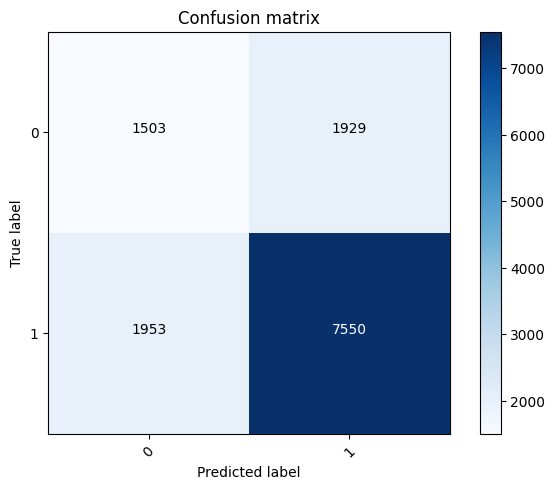

In [94]:
np.set_printoptions(precision=2)

print (classification_report(y_test, preds))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [95]:
df = train_df.drop(columns=exclude_columns)
df

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,Z87,Z90,Z92,Z95,Z96,Z98,Z99,Unnamed: 0,PSTV03,PSTV05
83314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14319,1964,1
112717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92276,1964,1
70754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26249,1963,1
49839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7137,1953,1
64764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78082,1960,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133698,1956,1
103694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71815,1964,1
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55050,1967,1
15795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,48415,1963,1


In [96]:
df = df.drop(columns='Unnamed: 0')

In [97]:
train_df

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
83314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,323900.0,0.0,0.0,0.0,0.0,0.0,323900,323900,0
112717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15,2856000.0,0.0,0.0,0.0,0.0,0.0,2856000,2856000,1
70754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,572600.0,0.0,0.0,0.0,0.0,0.0,572600,572600,0
49839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,729500.0,0.0,0.0,0.0,0.0,0.0,729500,729500,1
64764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,137,93752900.0,0.0,0.0,0.0,0.0,0.0,93752900,93752900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,108,167089600.0,0.0,0.0,0.0,0.0,0.0,167089600,167089600,1
103694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,133,61091300.0,0.0,0.0,0.0,0.0,0.0,61091300,61091300,1
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65,11430200.0,0.0,0.0,0.0,0.0,0.0,11430200,11430200,1
15795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38,20731500.0,0.0,7276600.0,0.0,0.0,0.0,28008100,28008100,1


In [33]:
combined_df1 = pd.read_pickle('combined_df1.pkl')

In [34]:
combined_df1

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,18531700.0,0.0,0.0,0.0,0.0,0.0,18531700,18531700,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,194300.0,0.0,0.0,0.0,0.0,0.0,194300,194300,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,2767500.0,0.0,0.0,0.0,0.0,0.0,2767500,2767500,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,16056200.0,0.0,0.0,0.0,0.0,0.0,16056200,16056200,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2556400.0,0.0,0.0,0.0,0.0,0.0,2556400,2556400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,4981400.0,0.0,0.0,0.0,0.0,0.0,4981400,4981400,0
129345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14,2566200.0,0.0,0.0,0.0,0.0,0.0,2566200,2566200,0
129346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89,49163200.0,0.0,0.0,0.0,0.0,0.0,49163200,49163200,1
129347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127,108622700.0,0.0,0.0,0.0,0.0,0.0,108622700,108622700,1


In [35]:
from sklearn.preprocessing import LabelEncoder
object_columns = combined_df1.select_dtypes(include='object').columns.tolist()
label_encoder = LabelEncoder()

for column in object_columns:
    combined_df1[column] = label_encoder.fit_transform(combined_df1[column])

In [36]:
train_df = pd.read_pickle("all_train_df.pkl")
test_df = pd.read_pickle("all_test_df.pkl")

In [37]:
common_indices = combined_df1.index.isin(train_df.index)
filtered_combined_df1 = combined_df1[common_indices]

In [38]:
filtered_combined_df1

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,194300.0,0.0,0.0,0.0,0.0,0.0,194300,194300,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,2767500.0,0.0,0.0,0.0,0.0,0.0,2767500,2767500,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,16056200.0,0.0,0.0,0.0,0.0,0.0,16056200,16056200,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2556400.0,0.0,0.0,0.0,0.0,0.0,2556400,2556400,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,192100.0,0.0,0.0,0.0,0.0,0.0,192100,192100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129343,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,4207600.0,0.0,0.0,0.0,0.0,0.0,4207600,4207600,1
129344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,4981400.0,0.0,0.0,0.0,0.0,0.0,4981400,4981400,0
129346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89,49163200.0,0.0,0.0,0.0,0.0,0.0,49163200,49163200,1
129347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127,108622700.0,0.0,0.0,0.0,0.0,0.0,108622700,108622700,1


In [39]:
common_indices = combined_df1.index.isin(test_df.index)
filtered_combined_df1_2 = combined_df1[common_indices]

In [40]:
filtered_combined_df1_2

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,18531700.0,0.0,0.0,0.0,0.0,0.0,18531700,18531700,1
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,55,67124900.0,0.0,28868200.0,0.0,0.0,0.0,95993100,95993100,1
33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45,22434000.0,0.0,0.0,0.0,0.0,0.0,22434000,22434000,1
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,6864000.0,0.0,0.0,0.0,0.0,0.0,6864000,6864000,1
62,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,34,36517800.0,0.0,0.0,0.0,0.0,0.0,36517800,36517800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,5168200.0,0.0,0.0,0.0,0.0,0.0,5168200,5168200,0
129322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73,17745300.0,0.0,0.0,0.0,0.0,0.0,17745300,17745300,1
129324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14,13677800.0,0.0,0.0,0.0,0.0,0.0,13677800,13677800,1
129330,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,1451200.0,0.0,0.0,0.0,0.0,0.0,1451200,1451200,1


In [41]:
filtered_combined_df1 = filtered_combined_df1.drop(columns=['Unnamed: 0'])

In [42]:
filtered_combined_df1

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,194300.0,0.0,0.0,0.0,0.0,0.0,194300,194300,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,2767500.0,0.0,0.0,0.0,0.0,0.0,2767500,2767500,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,16056200.0,0.0,0.0,0.0,0.0,0.0,16056200,16056200,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2556400.0,0.0,0.0,0.0,0.0,0.0,2556400,2556400,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,192100.0,0.0,0.0,0.0,0.0,0.0,192100,192100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129343,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,4207600.0,0.0,0.0,0.0,0.0,0.0,4207600,4207600,1
129344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,4981400.0,0.0,0.0,0.0,0.0,0.0,4981400,4981400,0
129346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89,49163200.0,0.0,0.0,0.0,0.0,0.0,49163200,49163200,1
129347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127,108622700.0,0.0,0.0,0.0,0.0,0.0,108622700,108622700,1


In [43]:
filtered_combined_df1_2 = filtered_combined_df1_2.drop(columns=['Unnamed: 0'])

In [44]:
filtered_combined_df1_2

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,18531700.0,0.0,0.0,0.0,0.0,0.0,18531700,18531700,1
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,55,67124900.0,0.0,28868200.0,0.0,0.0,0.0,95993100,95993100,1
33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45,22434000.0,0.0,0.0,0.0,0.0,0.0,22434000,22434000,1
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,6864000.0,0.0,0.0,0.0,0.0,0.0,6864000,6864000,1
62,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,34,36517800.0,0.0,0.0,0.0,0.0,0.0,36517800,36517800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,5168200.0,0.0,0.0,0.0,0.0,0.0,5168200,5168200,0
129322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73,17745300.0,0.0,0.0,0.0,0.0,0.0,17745300,17745300,1
129324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14,13677800.0,0.0,0.0,0.0,0.0,0.0,13677800,13677800,1
129330,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,1451200.0,0.0,0.0,0.0,0.0,0.0,1451200,1451200,1


In [45]:
for ICD in existing_columns:
    PSTV01_list = list(filtered_combined_df1.loc[filtered_combined_df1[ICD] > 0, 'PSTV01'])
    filtered_combined_df1.loc[~filtered_combined_df1['PSTV01'].isin(PSTV01_list), f'is_{ICD}'] = 0
    filtered_combined_df1.loc[filtered_combined_df1['PSTV01'].isin(PSTV01_list), f'is_{ICD}'] = 1

In [46]:
filtered_combined_df1

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,is_K75,is_E78,is_I10,is_I11,is_I15,is_I67,is_E66,is_G45,is_I61,is_I63
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129343,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
129347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
is_ICD_columns = []
for ICD in existing_columns:
    is_ICD_columns.extend([column for column in filtered_combined_df1.columns if f'is_{ICD}' in column])
class_labels = is_ICD_columns

In [48]:
for ICD in existing_columns:
    PSTV01_list = list(filtered_combined_df1_2.loc[filtered_combined_df1_2[ICD] > 0, 'PSTV01'])
    filtered_combined_df1_2.loc[~filtered_combined_df1_2['PSTV01'].isin(PSTV01_list), f'is_{ICD}'] = 0
    filtered_combined_df1_2.loc[filtered_combined_df1_2['PSTV01'].isin(PSTV01_list), f'is_{ICD}'] = 1

In [50]:
filtered_combined_df1['is_chronic']

1         0
2         1
3         1
4         1
5         0
         ..
129343    1
129344    0
129346    1
129347    1
129348    1
Name: is_chronic, Length: 116414, dtype: int64

In [54]:
df_final = filtered_combined_df1_2.copy()
ICD_list = existing_columns
PSTV01_list = list(df_final.loc[df_final[ICD_list].gt(0).any(axis=1), 'PSTV01'])
df_final.loc[~df_final['PSTV01'].isin(PSTV01_list), 'is_chronic'] = 0
df_final.loc[df_final['PSTV01'].isin(PSTV01_list), 'is_chronic'] = 1
for ICD in ICD_list:
    columns_to_drop = ['PSTV01', ICD]
    columns_to_drop.extend(class_labels)
    X_train = filtered_combined_df1.drop(columns_to_drop, axis=1).values
    y_train = filtered_combined_df1[f'is_{ICD}'].values
    rus = RandomUnderSampler(random_state=42)
    X_train, y_train= rus.fit_resample(X_train, y_train)
    model = RandomForestClassifier(50, max_depth=15, max_features=15)
    model.fit(X_train, y_train)
    X_test = filtered_combined_df1_2.drop(columns_to_drop, axis=1).values
    preds = model.predict(X_test)
    df_final[f'is_{ICD}_pred'] = preds
    if 'is_chronic_pred' not in df_final.columns:
        df_final['is_chronic_pred'] = preds
    else:
        df_final.loc[(df_final['is_chronic_pred'] == 0) & (preds == 1), 'is_chronic_pred'] = 1

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      3432
           1       0.92      0.96      0.94      9503

    accuracy                           0.91     12935
   macro avg       0.90      0.86      0.88     12935
weighted avg       0.91      0.91      0.91     12935

Confusion matrix, without normalization
[[2605  827]
 [ 360 9143]]


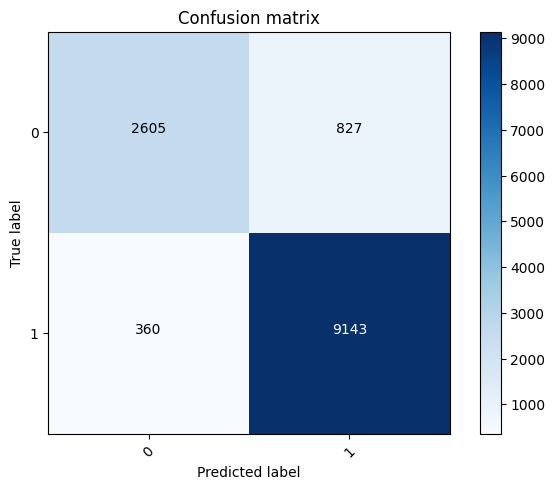

In [58]:
x_pred = df_final['is_chronic_pred'].values
y_test = df_final['is_chronic'].values
acc = accuracy_score(y_test, x_pred)
conf_mat = confusion_matrix(y_test, x_pred)
np.set_printoptions(precision=2)
print (classification_report(y_test, x_pred))
plt.figure()
plot_confusion_matrix(conf_mat, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [150]:
correlation_matrix.to_excel('correlation.xlsx')

In [2]:
df = pd.read_pickle('combined_df1.pkl')

In [4]:
df.query('is_chronic == 1')

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,18531700.0,0.0,0.0,0.0,0.0,0.0,18531700,18531700,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,2767500.0,0.0,0.0,0.0,0.0,0.0,2767500,2767500,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,16056200.0,0.0,0.0,0.0,0.0,0.0,16056200,16056200,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2556400.0,0.0,0.0,0.0,0.0,0.0,2556400,2556400,1
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23,20403500.0,0.0,0.0,0.0,0.0,0.0,20403500,20403500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129342,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,25496300.0,0.0,0.0,0.0,0.0,0.0,25496300,25496300,1
129343,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,4207600.0,0.0,0.0,0.0,0.0,0.0,4207600,4207600,1
129346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89,49163200.0,0.0,0.0,0.0,0.0,0.0,49163200,49163200,1
129347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127,108622700.0,0.0,0.0,0.0,0.0,0.0,108622700,108622700,1


In [5]:
df.query('is_chronic == 0')

,A01,A06,A09,A15,A16,A18,A41,A49,A90,A91,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,194300.0,0.0,0.0,0.0,0.0,0.0,194300,194300,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,192100.0,0.0,0.0,0.0,0.0,0.0,192100,192100,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,106,20025900.0,0.0,0.0,0.0,0.0,0.0,20025900,20025900,0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,8952700.0,0.0,7276600.0,0.0,0.0,0.0,16229300,16229300,0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62,11710900.0,0.0,0.0,0.0,0.0,0.0,11710900,11710900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129336,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,16,3046400.0,0.0,0.0,0.0,0.0,0.0,3046400,3046400,0
129337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,2035000.0,0.0,0.0,0.0,0.0,0.0,2035000,2035000,0
129340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,1802800.0,0.0,0.0,0.0,0.0,0.0,1802800,1802800,0
129344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,4981400.0,0.0,0.0,0.0,0.0,0.0,4981400,4981400,0


In [2]:
df = pd.read_pickle('combined_df1.pkl')

In [61]:
evaluation_df = pd.DataFrame(columns=['ICD', 'True Positive', 'True Negative', 'False Positive', 'False Negative', 'Accuracy', 'Macro Avg'])
for ICD in existing_columns:
    columns_to_drop = ['PSTV01', ICD]
    columns_to_drop.extend(class_labels)
    X_train = filtered_combined_df1.drop(columns_to_drop, axis=1).values
    y_train = filtered_combined_df1[f'is_{ICD}'].values
    rus = RandomUnderSampler(random_state=42)
    X_train, y_train= rus.fit_resample(X_train, y_train)
    X_test = filtered_combined_df1_2.drop(columns_to_drop, axis=1).values
    y_test = filtered_combined_df1_2[f'is_{ICD}'].values
    model = RandomForestClassifier(50, max_depth=15, max_features=15)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    accuracy = accuracy_score(y_test, preds)
    macro_avg = f1_score(y_test, preds, average='macro')
    evaluation_df = evaluation_df.append({
        'ICD': ICD,
        'True Positive': tp,
        'True Negative': tn,
        'False Positive': fp,
        'False Negative': fn,
        'Accuracy': accuracy,
        'Macro Avg': macro_avg
    }, ignore_index=True)

C:\Users\simis\AppData\Local\Temp\ipykernel_15296\3376243212.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
C:\Users\simis\AppData\Local\Temp\ipykernel_15296\3376243212.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
C:\Users\simis\AppData\Local\Temp\ipykernel_15296\3376243212.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
C:\Users\simis\AppData\Local\Temp\ipykernel_15296\3376243212.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
C:\Users\simis\AppData\Local\Tem

C:\Users\simis\AppData\Local\Temp\ipykernel_15296\3376243212.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
C:\Users\simis\AppData\Local\Temp\ipykernel_15296\3376243212.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
C:\Users\simis\AppData\Local\Temp\ipykernel_15296\3376243212.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
C:\Users\simis\AppData\Local\Temp\ipykernel_15296\3376243212.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
C:\Users\simis\AppData\Local\Tem

In [62]:
evaluation_df

,ICD,True Positive,True Negative,False Positive,False Negative,Accuracy,Macro Avg
0,C50,68,12058,802,7,0.937457,0.555729
1,C53,7,11780,1144,4,0.911249,0.482793
2,R18,13,10462,2456,4,0.809818,0.452629
3,A18,17,9239,3672,7,0.715578,0.421557
4,E10,962,7275,4521,177,0.636799,0.523235
5,E11,6389,4096,2038,412,0.810591,0.804446
6,E13,98,9127,3681,29,0.713181,0.440633
7,I12,182,11527,1186,40,0.905218,0.589218
8,I13,171,11103,1623,38,0.871589,0.550575
9,K76,27,8971,3915,22,0.695632,0.416793


In [63]:
evaluation_df.to_excel("all_features_evaluation_df_random_forest_undersampling.xlsx")